In [1]:
folder = 'log/'
files = ! ls $folder
print(files)

['0', '20211107203449', '20211107204815', '20211107205317', '20211107205516', '20211107205627', '20211107205751', '20211107210126', '20211107210147', '20211107212330', '20211107212527', '20211107212652', '20211109_1530_exploit', '20211114122413', '20211114122438', '20211114122651', '20211114151252', '20211114151422', '20211116224012', '20211116224103', '20211116224152', '20211116224327', 'gym_CartPole-v1_False_20210707103630', 'gym_CartPole-v1_False_20210707103718', 'gym_CartPole-v1_False_20210707103837', 'gym_CartPole-v1_False_20210707103900', 'gym_CartPole-v1_False_20210707104304', 'gym_CartPole-v1_False_20210707104329', 'gym_CartPole-v1_False_20210707104400', 'gym_CartPole-v1_False_20210707104547', 'gym_CartPole-v1_False_20210707104604', 'gym_CartPole-v1_False_20210707104619', 'gym_CartPole-v1_False_20210707134456', 'gym_CartPole-v1_False_20210707171454', 'gym_CartPole-v1_False_PPO_20210820151720', 'gym_CartPole-v1_False_PPO_20210820151749', 'gym_CartPole-v1_False_PPO_20210820151909

In [2]:
import json

def load_data(file_name):
    file_dir = folder+files[0]
    file_dir = folder+file_name
    print(file_dir)
    
    data = json.load( open(file_dir+"/process.json"))
    print(data.keys())
    return data

In [40]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'
# plt.style.use('seaborn-whitegrid')
plt.style.use('default')
import matplotlib.cm as cm


def plot(data, method, color, agent_to_plot, smooth_radius=200, range=100000):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    k = method
    v = data[agent_to_plot]
    plt.plot(v[:range], color=color, alpha=0.2)
    plt.plot(smooth(v[:range], radius=smooth_radius), color=color, label=k)

    
img_path = 'generated_img/'

['pettingzoo_boxing_v1_fictitious_selfplay', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_selfplay', 'pettingzoo_surround_v1_fictitious_selfplay', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_selfplay']
['pettingzoo_boxing_v1_fictitious_selfplay', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_selfplay']
log/20211109_1530_exploit/pettingzoo_boxing_v1_fictitious_selfplay
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_boxing_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_boxing_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_boxing_v1_nfsp
dict_keys(['episode_reward', 'los

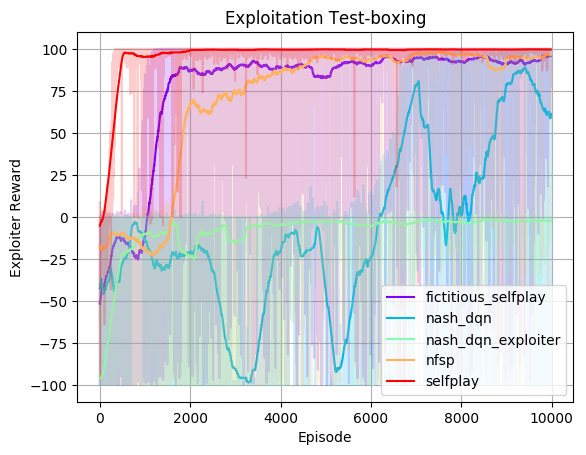

In [41]:
env = 'boxing'
folder = 'log/20211109_1530_exploit/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 5))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_fictitious_selfplay', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_selfplay', 'pettingzoo_surround_v1_fictitious_selfplay', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_selfplay']
['pettingzoo_surround_v1_fictitious_selfplay', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_selfplay']
log/20211109_1530_exploit/pettingzoo_surround_v1_fictitious_selfplay
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_surround_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_surround_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_surround_v1_nfsp
dict_keys(['epi

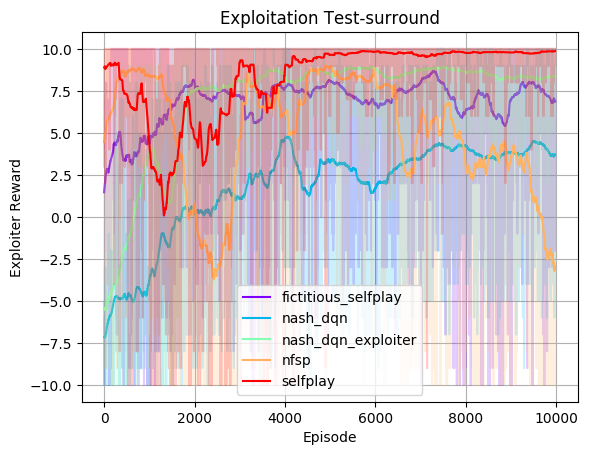

In [42]:
env = 'surround'
folder = 'log/20211109_1530_exploit/'
files = ! ls $folder
print(files)
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
colors = cm.rainbow(np.linspace(0, 1, 5))
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}.pdf'
plt.savefig(savepath, bbox_inches='tight',)